 ## <font color='indigo'>Сборный проект №1</font>

### <font color='green'>Получение данных и их просмотр:</font>

<font color='navy'> - Просмотр входных данных и работа с ними: удаление дубликатов, пропусков. \
    - Поиск аномальных значений \
    - Предварительные выводы о собранных данных </font>

### <font color='green'>Обработка данных:</font>


<font color='navy'> - Найти и обработать пропуски \
    - Поработать с дубликатами (если они есть) \
    - Удалить пропуски, где это возможно \
    - Заменить названия столбцов\
    - Преобразовать данные в нужные типы \
    - Обработка значения 'tbd'\
    - Посчитать суммарные продажи во всех регионах
</font>

### <font color='green'>Вопросы исследования</font>

<font color='navy'> - Какова динамика выпуска игр по разным годам? Важны ли все периоды? \
    - Как меняются продажи по разным платформам? \
    - Удалить пропуски, где это возможно \
    - Какие платформы лидируют по продажам, растут или падают? Какие платформы потенциально прибыльны?\
    - Как распределяются продажи в зависимости от платформы (ящик с усами)? \
    - Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?\
    - Какие самые прибыльные жанры? Выделяются ли жанры с высокими и низкими продажами?
</font>

### <font color='green'>Результаты исследования</font>

<font color='navy'> - Выводы\
    - Рекомендации </font>

#### <font color='indigo'> Описание данных </font>
Name — название игры\
Platform — платформа\
Year_of_Release — год выпуска\
Genre — жанр игры\
NA_sales — продажи в Северной Америке (миллионы проданных копий)\
EU_sales — продажи в Европе (миллионы проданных копий)\
JP_sales — продажи в Японии (миллионы проданных копий)\
Other_sales — продажи в других странах (миллионы проданных копий)\
Critic_Score — оценка критиков (максимум 100)\
User_Score — оценка пользователей (максимум 10)\
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию\
Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    df = pd.read_csv('/Users/temp/Desktop/projects/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.columns = df.columns.str.lower()

Приведём к "змеиному регистру" все заголовки

In [5]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В user_score должны быть числовые данные.

In [7]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Попробуем понять, что за странное tbd

In [8]:
df[df['user_score'] == 'tbd'].count()

name               2424
platform           2424
year_of_release    2376
genre              2424
na_sales           2424
eu_sales           2424
jp_sales           2424
other_sales        2424
critic_score       1082
user_score         2424
rating             2374
dtype: int64

In [9]:
df[df['user_score'] == 'tbd'].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5777,Shaun White Snowboarding,PS2,2008.0,Sports,0.15,0.12,0.0,0.04,NaN,tbd,E10+
9981,Where the Wild Things Are,Wii,2009.0,Platform,0.11,0.00,0.0,0.01,65.0,tbd,E10+
6302,Remington Super Slam Hunting: Africa,Wii,2010.0,Sports,0.25,0.00,0.0,0.02,NaN,tbd,T
9916,Zenses: Ocean,DS,2008.0,Puzzle,0.10,0.01,0.0,0.01,56.0,tbd,E
8178,Speedball 2100,PS,2000.0,Sports,0.10,0.07,0.0,0.01,60.0,tbd,E


Из определения: \
TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.\
То есть база как-то обновляется и оценка не может быть дана. Заменить это на значение будет некорректно, поэтому можно заменить это на пропуск.

In [10]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan

In [11]:
df['user_score'] = df['user_score'].astype(float)

In [12]:
df['user_score'].sample()

14063   NaN
Name: user_score, dtype: float64

Теперь у нас числовое значение в этом столбце.

In [13]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Видим, что по продажам есть аномально высокие - 41, 28 и 10 млн. Пока непонятно, что с ними делать. Возможно, есть правда очень большие продажи игр (какие-нибудь игры, которые имеют высокую популярность). 

In [14]:
pd.DataFrame(round(df.isna().mean(),5)).style.background_gradient('coolwarm')

,0
name,0.000120
platform,0.000000
year_of_release,0.016090
genre,0.000120
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.513190
user_score,0.545920


Большое число пропусков в стобце оценки критиков 51%, в стоблце оценки пользователей 40% и в рейтинге игры 40%. Причина, возможно, очень проста: на какие-то игры критики и пользователи не оставляли свой отзыв. Поэтому отсуствие оценок можно заменить на -1 (так как оценка ноль это тоже оценка по шкале - это видно из минимального значения по user_score в таблице describe), а в рейтинг добавить отдельную группу для таких игр - no_reting

In [15]:
df['user_score'] = df['user_score'].fillna(-1)
df['critic_score'] = df['critic_score'].fillna(-1)
df['rating'] = df['rating'].fillna('no_rating')

Также есть пропуски в названиях и жанре. По сути это не будет влиять, например, на продажи игр - название и жанр у них может быть любой. Поэтому назвать мы их можем как хотим: просто это будет отдельная группа - без названий и жанров.

In [16]:
df['genre'] = df['genre'].fillna('no_genre')
df['name'] = df['name'].fillna('no_name')

In [17]:
df.duplicated().sum()

0

Явных дубликатов нет.

In [18]:
df['sales_total'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df ['other_sales'] 


Подсчитали суммарные продаж во всех регионах и записали их в отдельный столбец.

In [19]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_rating,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_rating,31.38


### Исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

<AxesSubplot:>

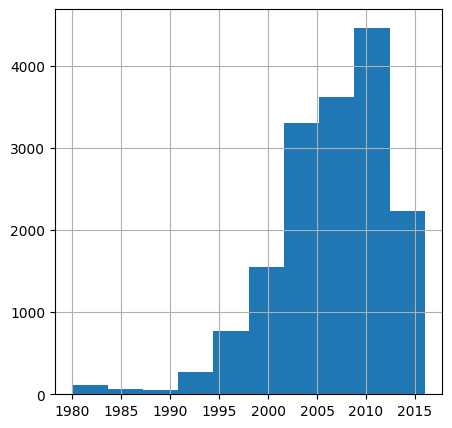

In [20]:
df['year_of_release'].hist(figsize = (5,5))

Мы видим, что игры выпускались с 1980 года. Но для исследования старые данные ничего не дадут, они неактуальны на текущий момент, тем более если мы хотим описать типичного пользователя игр. Поэтому использовать данные нужно за последние годы. Видим, что пик продаж приходится на 2008 - 2011 годы. Это связано с повышением доступности ПК и быстрым развитием индустрии игр. Со временем это спрос идет на спад.\
Для того, чтобы исследование было достоверным, можно использовать данные после пика роста продаж - более приемлимые для жизни, то есть с 2012 года. Потому что резких скачков в продаж, скорее всего, не будет.

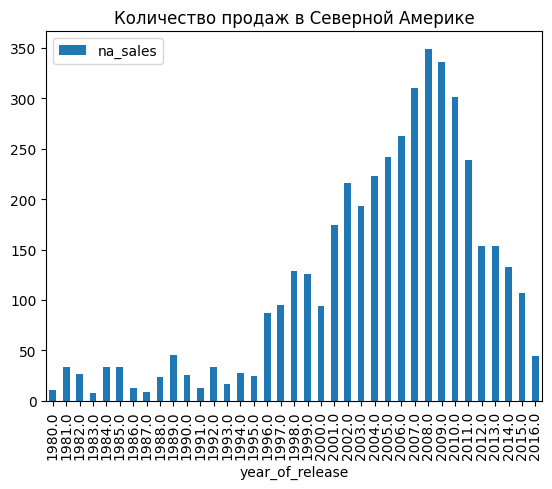

In [21]:
na = df.pivot_table(index = 'year_of_release', values = 'na_sales', aggfunc = 'sum').plot(kind = 'bar', title = 'Количество продаж в Северной Америке')

Северная Америка - это лидер по продажам. Высокие значения наблюдаются в 2008-2010 годах. Максимальное значение продаж за год в 2008 году приближается к 350 млн. Причем распределение похоже на нормальное, но скошенное слева (что тоже логично, потому что в самом зарождении игровой индуустрии были совсем небольшие продажи - малое количество игр + малый спрос на них).

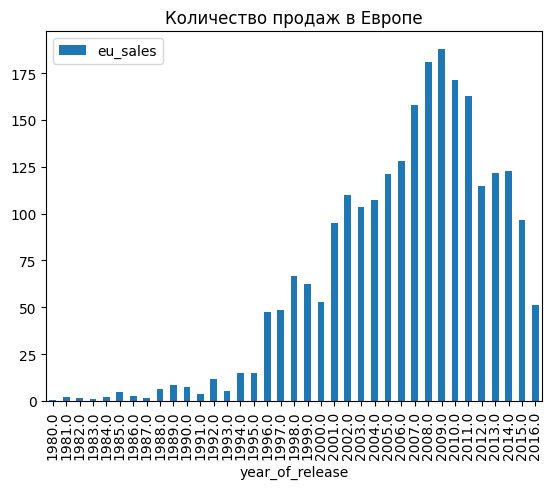

In [22]:
eu = df.pivot_table(index = 'year_of_release', values = 'eu_sales', aggfunc = 'sum').plot(
    kind = 'bar', title = 'Количество продаж в Европе')

Европа идет вторым по продажам регионом, но заметно проигрывает Северной Америке. Пики в Европе приходятся тоже на 2008-2010 годы, потом начинается снижение.

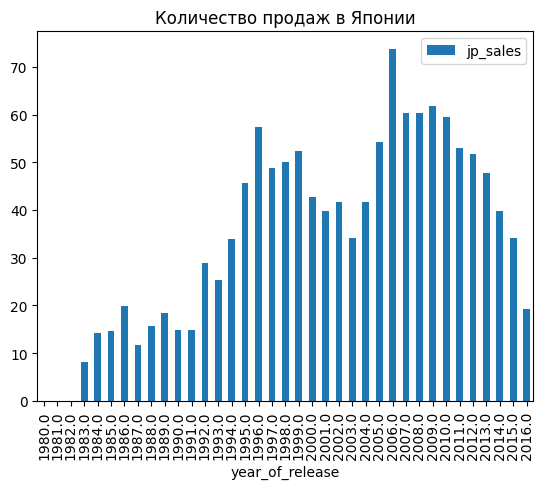

In [23]:
jp = df.pivot_table(index = 'year_of_release', values = 'jp_sales', aggfunc = 'sum').plot(
    kind = 'bar', title = 'Количество продаж в Японии')

Количество продаж в Японии стоит на третьем месте. Но это обусловлено и меньшей численностью населения в этой стране. Наблюдается плавное нарастание продаж игр по десятилетиям с небольшими спадами, после которых снова начинался подъём. 

Актуальным периодом для прогнозирования на 2017 год выберем данные после 2012 года. 

In [69]:
data = df.query('year_of_release > 2012').copy()

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   float64
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  sales_total      2233 non-null   float64
dtypes: float64(8), object(4)
memory usage: 226.8+ KB


In [71]:
pd.DataFrame(round(data.isna().mean(),5)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


Пропусков нет, поэтому можно работать с этими данными.

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   float64
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  sales_total      2233 non-null   float64
dtypes: float64(8), object(4)
memory usage: 226.8+ KB


### Ответы на вопросы исследования

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

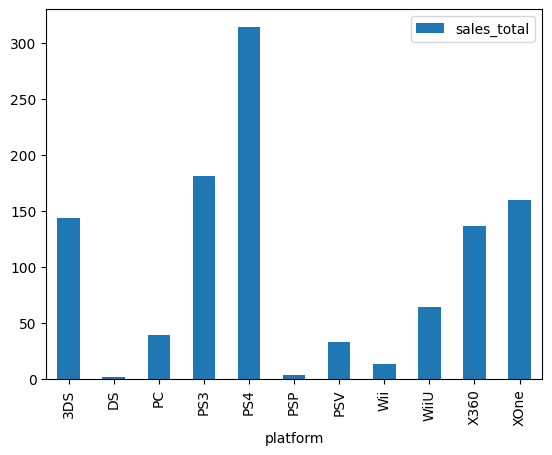

In [73]:
sales_by_platform = data.pivot_table(index = 'platform', values = 'sales_total', aggfunc = 'sum')
sales_by_platform.plot(kind = 'bar')
plt.show()

За 2013-2016 годы лидируют такие платформы как PS4, PS3, XOne, 3DS. А вот низкие продажи наблюдаются у PSP, DS, Wii, PSV.

<AxesSubplot:xlabel='year_of_release'>

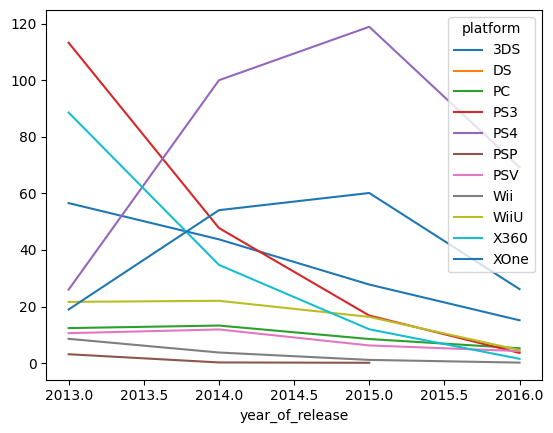

In [74]:
sales_by_year = data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales_total', aggfunc = 'sum')
sales_by_year.plot()

Тут уже видна динамика по годам. Есть платформы, которые только недавно появились, но сейчас на них растет активность - это PS4 и XOne. Так как данные за 2016 год непольные, то спад, который показывают графики, может не быть спадом (возможно в 2016 году у данных платформах тоже есть рост).\
А есть платформы, где продажи стремительно снижаются - PS3, 3DC и X360. Эти платформы не могут называться перспективными.\
Потенциально прибыльны PS4 и XOne, они лидируют по активности продаж в последние годы. Также для определения лидерующей платформы в исследовании можно сузить временной период и рассмотреть данные с 2015 года. Что поменяется?

In [75]:
data2 = df.query('year_of_release > 2015').copy()

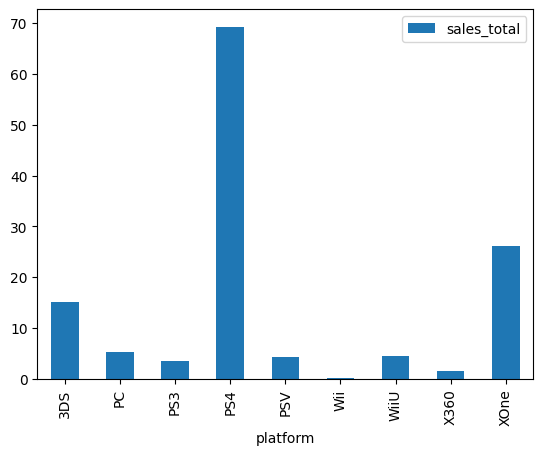

In [76]:
sales_by_platform2 = data2.pivot_table(index = 'platform', values = 'sales_total', aggfunc = 'sum')
sales_by_platform2.plot(kind = 'bar')
plt.show()

Потенциально прибыльной может считаться PS4, а на втором месте будет XOne.

#### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   float64
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  sales_total      2233 non-null   float64
dtypes: float64(8), object(4)
memory usage: 226.8+ KB


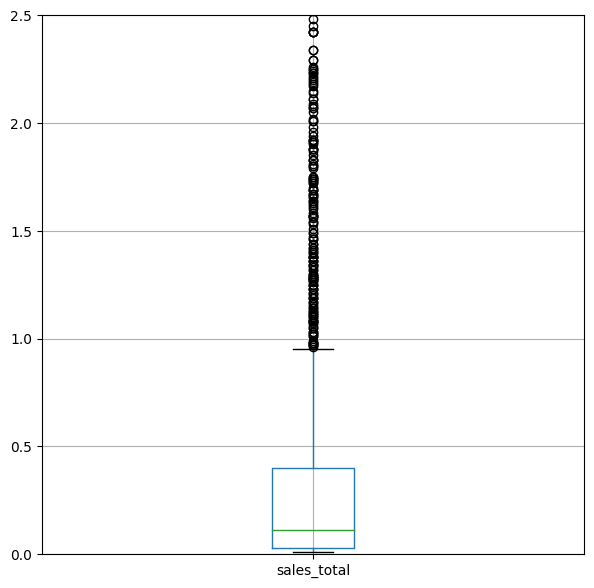

In [78]:
global_sales = data.boxplot('sales_total', figsize=(7,7)).set_ylim(0, 2.5)

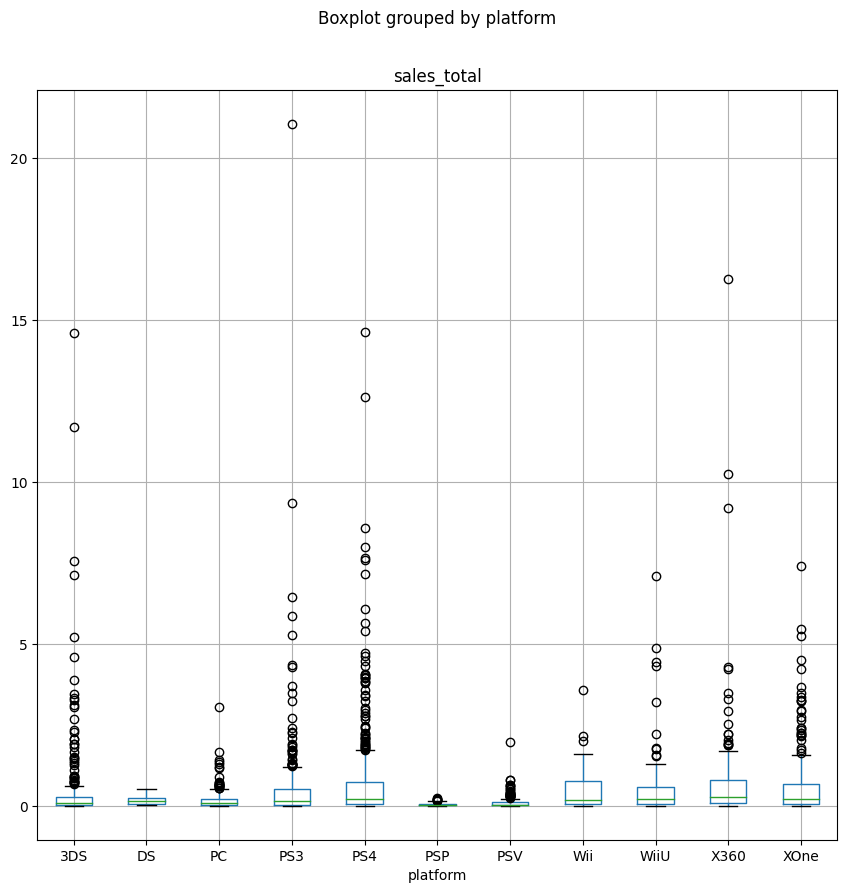

In [79]:
boxplot = data.boxplot(column='sales_total', by='platform', figsize = (10,10))

Как мы видим, медианные продажи по каждом платформе сильно ниже тех значений, которые признаются выбросами. То есть иногда выпускаются игры, которые дают сильные скачки продаж. Но обычно - игры имеют относительно невысокие доходы по своим продажам.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   float64
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  sales_total      2233 non-null   float64
dtypes: float64(8), object(4)
memory usage: 226.8+ KB


In [81]:
critic_score = data[data['critic_score'] != -1]
user_score = data[data['user_score'] != -1]

Надо очистить от значений -1, так как если они будут, то корреляция будет выше за счёт одинаковых значений

In [82]:
corr_df = pd.DataFrame()
corr_df['critic_score'] = critic_score['critic_score']
corr_df['user_score'] = user_score['user_score']

In [83]:
corr = corr_df[['critic_score', 'user_score']].corr()
corr

,critic_score,user_score
critic_score,1.000000,0.502221
user_score,0.502221,1.000000


Можно заметить, что корреляция между оценками критиков и оценками пользователей не очень высокая. Обычно, оценки должны совпадать, если мнения сторон являются объективными. Но та как есть разница междц оценками, то нельзя точно сказать, кто даёт искаженное мнение об игре. Кто-то может завышать оценки, а кто-то занижать. 

#### Внутри одной популярной платформы (PS4)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4022 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4022 non-null   object 
 1   platform         4022 non-null   object 
 2   year_of_release  4022 non-null   float64
 3   genre            4022 non-null   object 
 4   na_sales         4022 non-null   float64
 5   eu_sales         4022 non-null   float64
 6   jp_sales         4022 non-null   float64
 7   other_sales      4022 non-null   float64
 8   critic_score     4022 non-null   float64
 9   user_score       4022 non-null   float64
 10  rating           4022 non-null   object 
 11  sales_total      4022 non-null   float64
dtypes: float64(8), object(4)
memory usage: 408.5+ KB


In [40]:
ps4 = data[data['platform'] == 'PS4']
ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no_rating,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,no_rating,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [41]:
critic_sc = ps4[ps4['critic_score'] != -1]

In [42]:
user_sc = ps4[ps4['user_score'] != -1]

In [43]:
## не понимаю как сделать, чтобы корреляция была только по одной платформе

In [44]:
corr_df2 = pd.DataFrame(data = ps4)
corr_df2['critic_sc'] = critic_score['critic_score']
corr_df2['user_sc'] = user_score['user_score']

<AxesSubplot:xlabel='critic_score', ylabel='user_score'>

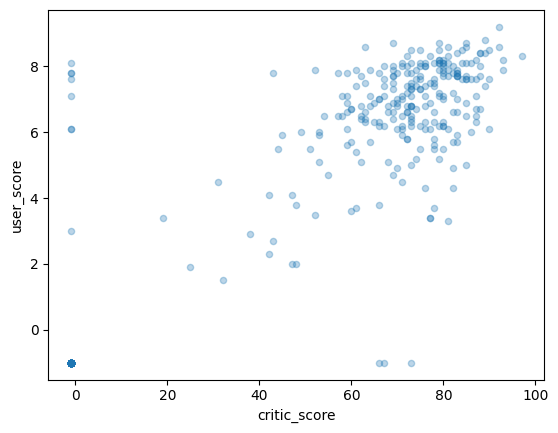

In [45]:
ps4.plot(x='critic_score', y='user_score', kind='scatter', alpha=0.3) 

####  Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

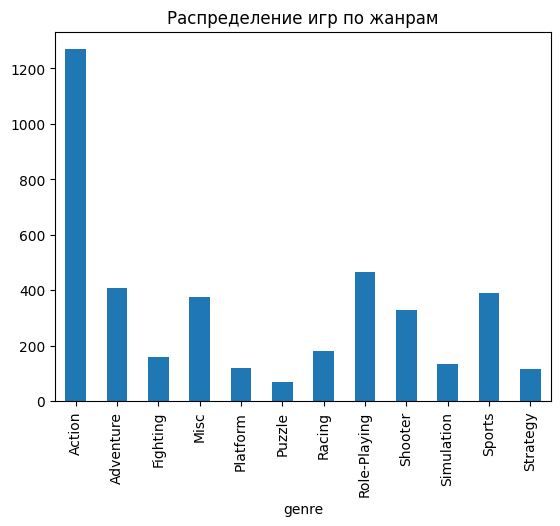

In [47]:
data.pivot_table(index = 'genre', values = 'platform', aggfunc = 'count').plot(kind = 'bar', legend = False, title = 'Распределение игр по жанрам')
plt.show()

Самые популярные среди пользователей за 2013-2016 годы - это экш-игры. Экшн-игры сосредоточены на физических задачах, требующих зрительно-моторной координации и быстрых рефлексов, поэтому они так интересны пользователям. Самые непопулярные - это пазлы, платформеры и стратегии. Вероятно, спрос на подобные жанры низкий, поэтому и выпускают их меньше. 

### Составление портрета пользователя каждого региона

#### Самые популярные платформы (топ-5)

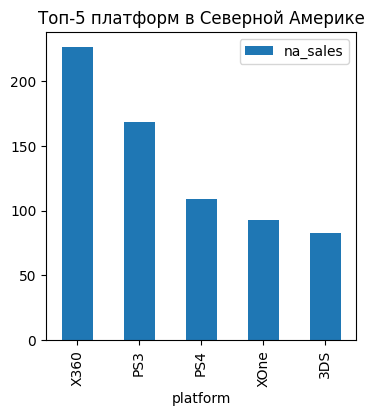

In [48]:
data.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', 
                                                              ascending=False).head(5).plot(
    kind='bar', figsize = (4,4), title = 'Топ-5 платформ в Северной Америке')

plt.show()

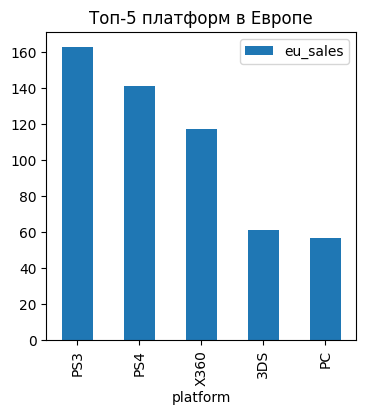

In [49]:
data.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', 
                                                              ascending=False).head(5).plot(
    kind='bar', figsize = (4,4), title = 'Топ-5 платформ в Европе')

plt.show()

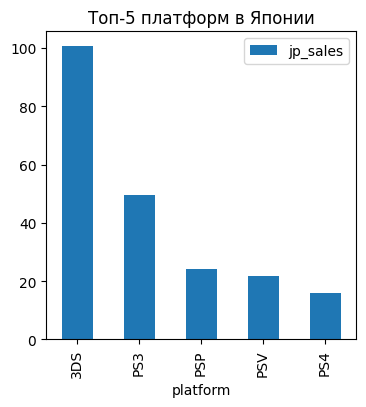

In [50]:
data.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', 
                                                              ascending=False).head(5).plot(
    kind='bar', figsize = (4,4), title = 'Топ-5 платформ в Японии')

plt.show()

Рынок Северной Америки и Европы схож между собой. Первые три платформы по популярности - одни и те же (только в разном порядке). На первом месте в Северной Америке находится X360, а в Европе PS3. В Японии видимо больше распространена платформа 3DS, на что показывает большое количество покупок именно на этой платформе.

#### Самые популярные жанры (топ-5)

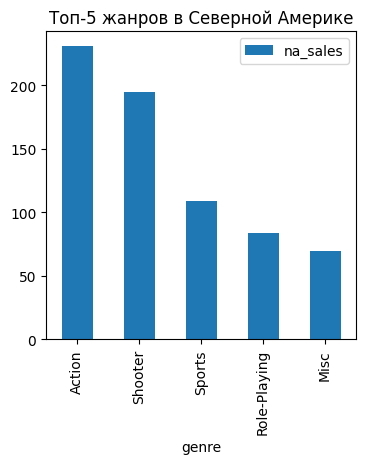

In [51]:
data.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', 
                                                              ascending=False).head(5).plot(
    kind='bar', figsize = (4,4), title = 'Топ-5 жанров в Северной Америке')

plt.show()

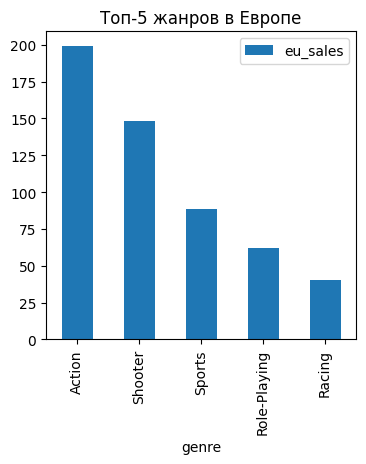

In [52]:
data.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', 
                                                              ascending=False).head(5).plot(
    kind='bar', figsize = (4,4), title = 'Топ-5 жанров в Европе')

plt.show()

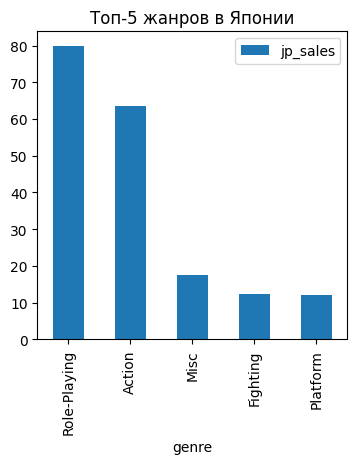

In [53]:
data.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', 
                                                              ascending=False).head(5).plot(
    kind='bar', figsize = (4,4), title = 'Топ-5 жанров в Японии')

plt.show()

Лидеры жанров в Северной Америке и в Европе очень схожи: первые четыре позиции занимаются одни и те же жанры. Больше всего игроки из Северной Америки и Европы любят жанр экшy, шутер (стрелялки), спортивные и ролевые. Схожесть этих двух регионов связана с популяризацией западной культуры и формированием массовых интересов у потребителей игр. В Японии же лидируют ролевые игры, потом идут экшн. Видимо японцам больше интересны игры с ролями, чем что-либо другое.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [54]:
data['rating'].unique()

array(['M', 'no_rating', 'E', 'E10+', 'T', 'EC', 'RP'], dtype=object)

Рейтинг ESRB:\
M («Mature») — "От 17 лет"\
E («Everyone») — "Для всех"\
«E10+» («Everyone 10 and older») «Для всех старше 10 лет»\
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше\
«EC» («Early childhood») — «Для детей младшего возраста»\
«RP» («Rating Pending»") — «Рейтинг ожидается»

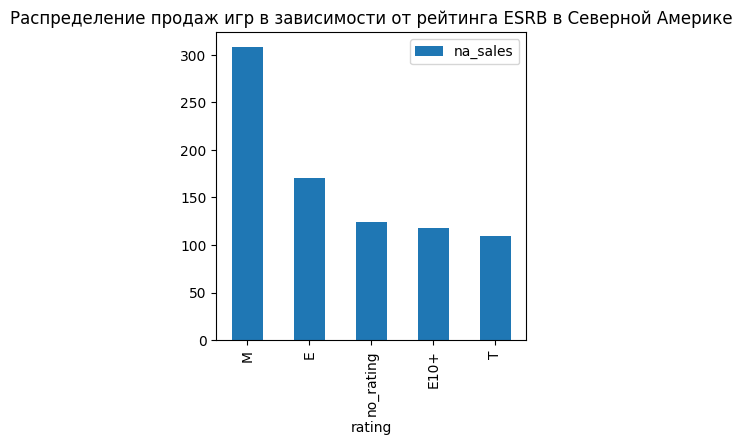

In [55]:
data.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(
    kind='bar', figsize = (4,4), title ='Распределение продаж игр в зависимости от рейтинга ESRB в Северной Америке' )
plt.show()

Наибольшие продажи в Северной Америке приходятся на игры от 17 лет. Что вполне логично, ведь целевая аудитория в Северной Америке - это подростки и молодые люди, спрос которых на игры достаточно высок. Меньше продаж по играм, которые предназначены для всех.

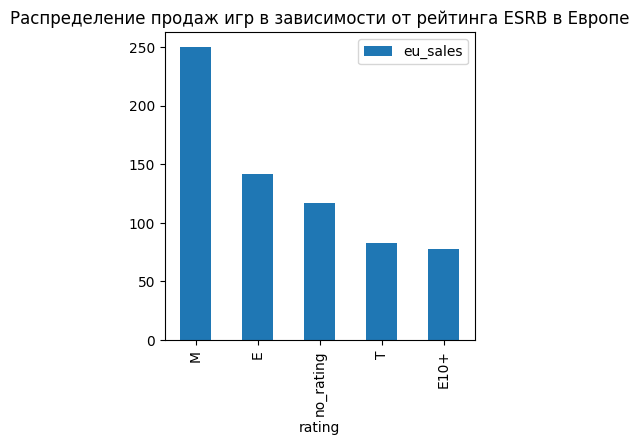

In [56]:
data.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(
    kind='bar', figsize = (4,4), title ='Распределение продаж игр в зависимости от рейтинга ESRB в Европе' )
plt.show()

В Европе также популярными среди продаж идут игры с рейтингом 17+, что аналогично ситуации в Северной Америке. Уже ранее было замечено, что потребители этих рыноков видеоигр схожи. 

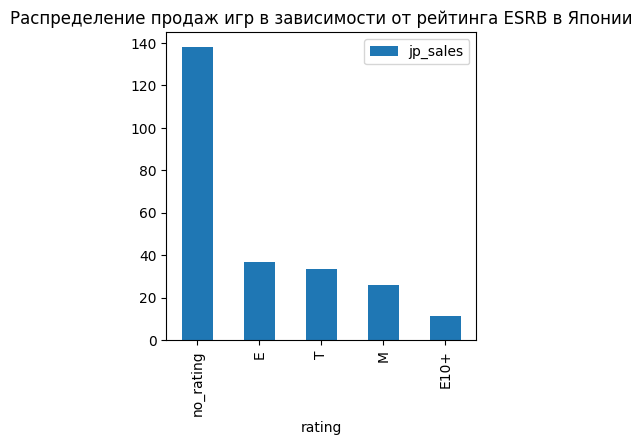

In [57]:
data.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(
    kind='bar', figsize = (4,4), title ='Распределение продаж игр в зависимости от рейтинга ESRB в Японии')
plt.show()

В Японии ситуация несколько сложнее, так как для большого числа игр не удалось установить рейтинг (там изначально были пропуски). Но популярными здесь являются игры "для всех" и игры для подростков (13+).

#### Общий вывод:
По сути рейтинг влияет, но не сильно. Потому что, например, в Северной Америке и в Европе, активные пользователи игр - это подростки и молодые люди, поэтому они попадают под эту категорию. Но точно сказать, влияет ли рейтинг нельзя, поскольку есть множество факторов, которые тоже влияют на продажи. Игра может быть просто интересной и круто разработанной, поэтому её будут покупать вне зависимости от того, какой рейтинг ESRB был установлен.

### Проверка гипотез

In [84]:
from scipy import stats as st

#### 1 гипотеза

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - это гипотеза H0\
H1 - то, что рейтинги разные\
Пусть уровень статистического значимости = 0.05\
Эти выборки независимы - те пользователи, кто пользуется Xbox не пересекаются с PC

Если p> alpha: принять нулевую гипотезу.
Если p <= alpha: отклоните нулевую гипотезу.

In [85]:
data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [86]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,no_rating,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [87]:
user_xbox = data[(data['platform'] == 'XOne') & (data['user_score'] > 0)]

In [88]:
user_pc = data[(data['platform'] == 'PC') & (data['user_score'] > 0)]

In [89]:
alpha = 0.05
results = st.ttest_ind(user_xbox['user_score'], user_pc['user_score'])
print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Действительно, средние пользовательские рейтинги у этих платформ одинаковые.

#### 2 гипотеза

H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.\
H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.\
Это тоже независимые выборки

In [90]:
action_r = data[data['genre'] == 'Action']

In [91]:
sports_r = data[data['genre'] == 'Sports']

In [92]:
alpha = 0.05
results = st.ttest_ind(action_r['user_score'], sports_r['user_score'])
print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.02193663336455412
Отвергаем нулевую гипотезу


Всё-таки средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные одинаковые. Возможно, эти жанры отличаются между собой, пользователи дают им разные оценки. Так как в ходе исследования было выявлено, что жанр "экшн" в играх самый популярны среди пользователей Северной Америки и Европы, а Японии он занимает 2 место по продажам. А вот спортивные игры в Северной Америке и Европе занимаются 3 место, а в Японии даже не входят в топ-5. Похоже, спортивные игры не всем по вкусу, что обуслвливает различие в оценках. 

###  Общий вывод 

Для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, для построения прогноза по продажам игр в разные регионы было важно понять, как сильно отличаются продажи в них и насколько разные пользователи между собой.\

В ходе исследования мы поняли, что рынок игр Северной Америки очень похож на рынок игр в Европе, что позволит компании строить примерно одинаковую политику по продажам там. А вот к рынку игр Японии нужно будет найти другой подход и предлагать игры, на которые есть спрос. Так как игровая индустрия быстро меняется и меняются платформы на которых играют пользователи, то период для прогноза был выбран с 2013 года. Были определены тендеции продаж последних лет. \

Удалось понять то, какие платформы используют в разных регионах и какие жанры лидируют. Также был сделан вывод о зависимости оценок пользователей и критиков на продажи и то, влияет ли рейтинг ESRB на продажи игр. В обоих случаях связь не совсем однозначная, но вот оценки пользователей и критиков, похоже, всё таки влияют на продажи, поэтому на них тоже нужно обратить внимание при работе. 

### Рекомедации

Нужно поработать над системой рейтинга оценок пользователей и критиков по играм, чтобы минимизировать пропуски. Возможно после покупки игры и того, как пользователей провёл в ней достаточно времени, предлагать оценить этот продукт на сайте. Можно ввести поощрение за добавление отзывов к играм, что позволит детальнее раскрыть портрет покупателя.\

Для рынка Японии стоит сформировать отдельную стратегию по продажам, которая будет учитывать его отличительные особенности. Для Северной Америки и Европы стратегии могут быть похожи.\

Для игр с аномально высокими продажами можно сделать свой рейтинг на сайте, типа бестселлеры. А вот чтобы стимулировать рост продаж игр "новичков", которые не сильно раскручены рынком - нужно придумать отдельные рейтинги и рекомедации к их покупке. Потому что пользователи могут не хотеть играть в "очень популярные игры", а им хочется чего-то нового и необычного. Таким образом продвижение новых игр позволит магазину расти в продажах не только по бестселлерам, но и по другим продуктам.